In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [3]:
data=pd.read_csv('NPHA-doctor-visits.csv') 
data['Number of Doctors Visited'].value_counts()

Number of Doctors Visited
2    372
3    211
1    131
Name: count, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Number of Doctors Visited                   714 non-null    int64
 1   Age                                         714 non-null    int64
 2   Phyiscal Health                             714 non-null    int64
 3   Mental Health                               714 non-null    int64
 4   Dental Health                               714 non-null    int64
 5   Employment                                  714 non-null    int64
 6   Stress Keeps Patient from Sleeping          714 non-null    int64
 7   Medication Keeps Patient from Sleeping      714 non-null    int64
 8   Pain Keeps Patient from Sleeping            714 non-null    int64
 9   Bathroom Needs Keeps Patient from Sleeping  714 non-null    int64
 10  Uknown Keeps Patient from Sleeping    

In [5]:
data.head()

Number of Doctors Visited  Age  Phyiscal Health  Mental Health  \
0                          3    2                4              3   
1                          2    2                4              2   
2                          3    2                3              2   
3                          1    2                3              2   
4                          3    2                3              3   

   Dental Health  Employment  Stress Keeps Patient from Sleeping  \
0              3           3                                   0   
1              3           3                                   1   
2              3           3                                   0   
3              3           3                                   0   
4              3           3                                   1   

   Medication Keeps Patient from Sleeping  Pain Keeps Patient from Sleeping  \
0                                       0                                 0   
1                                       0                                 0   
2                                       0                                 0   
3                                       0                                 0   
4                                       0                                 0   

   Bathroom Needs Keeps Patient from Sleeping  \
0                                           0   
1                                           1   
2                                           0   
3                                           1   
4                                           0   

   Uknown Keeps Patient from Sleeping  Trouble Sleeping  \
0                                   1                 2   
1                                   0                 3   
2                                   1                 3   
3                                   0                 3   
4                                   0                 2   

   Prescription Sleep Medication  Race  Gender  
0                              3     1       2  
1                              3     1       1  
2                              3     4       1  
3                              3     4       2  
4                              3     1       2

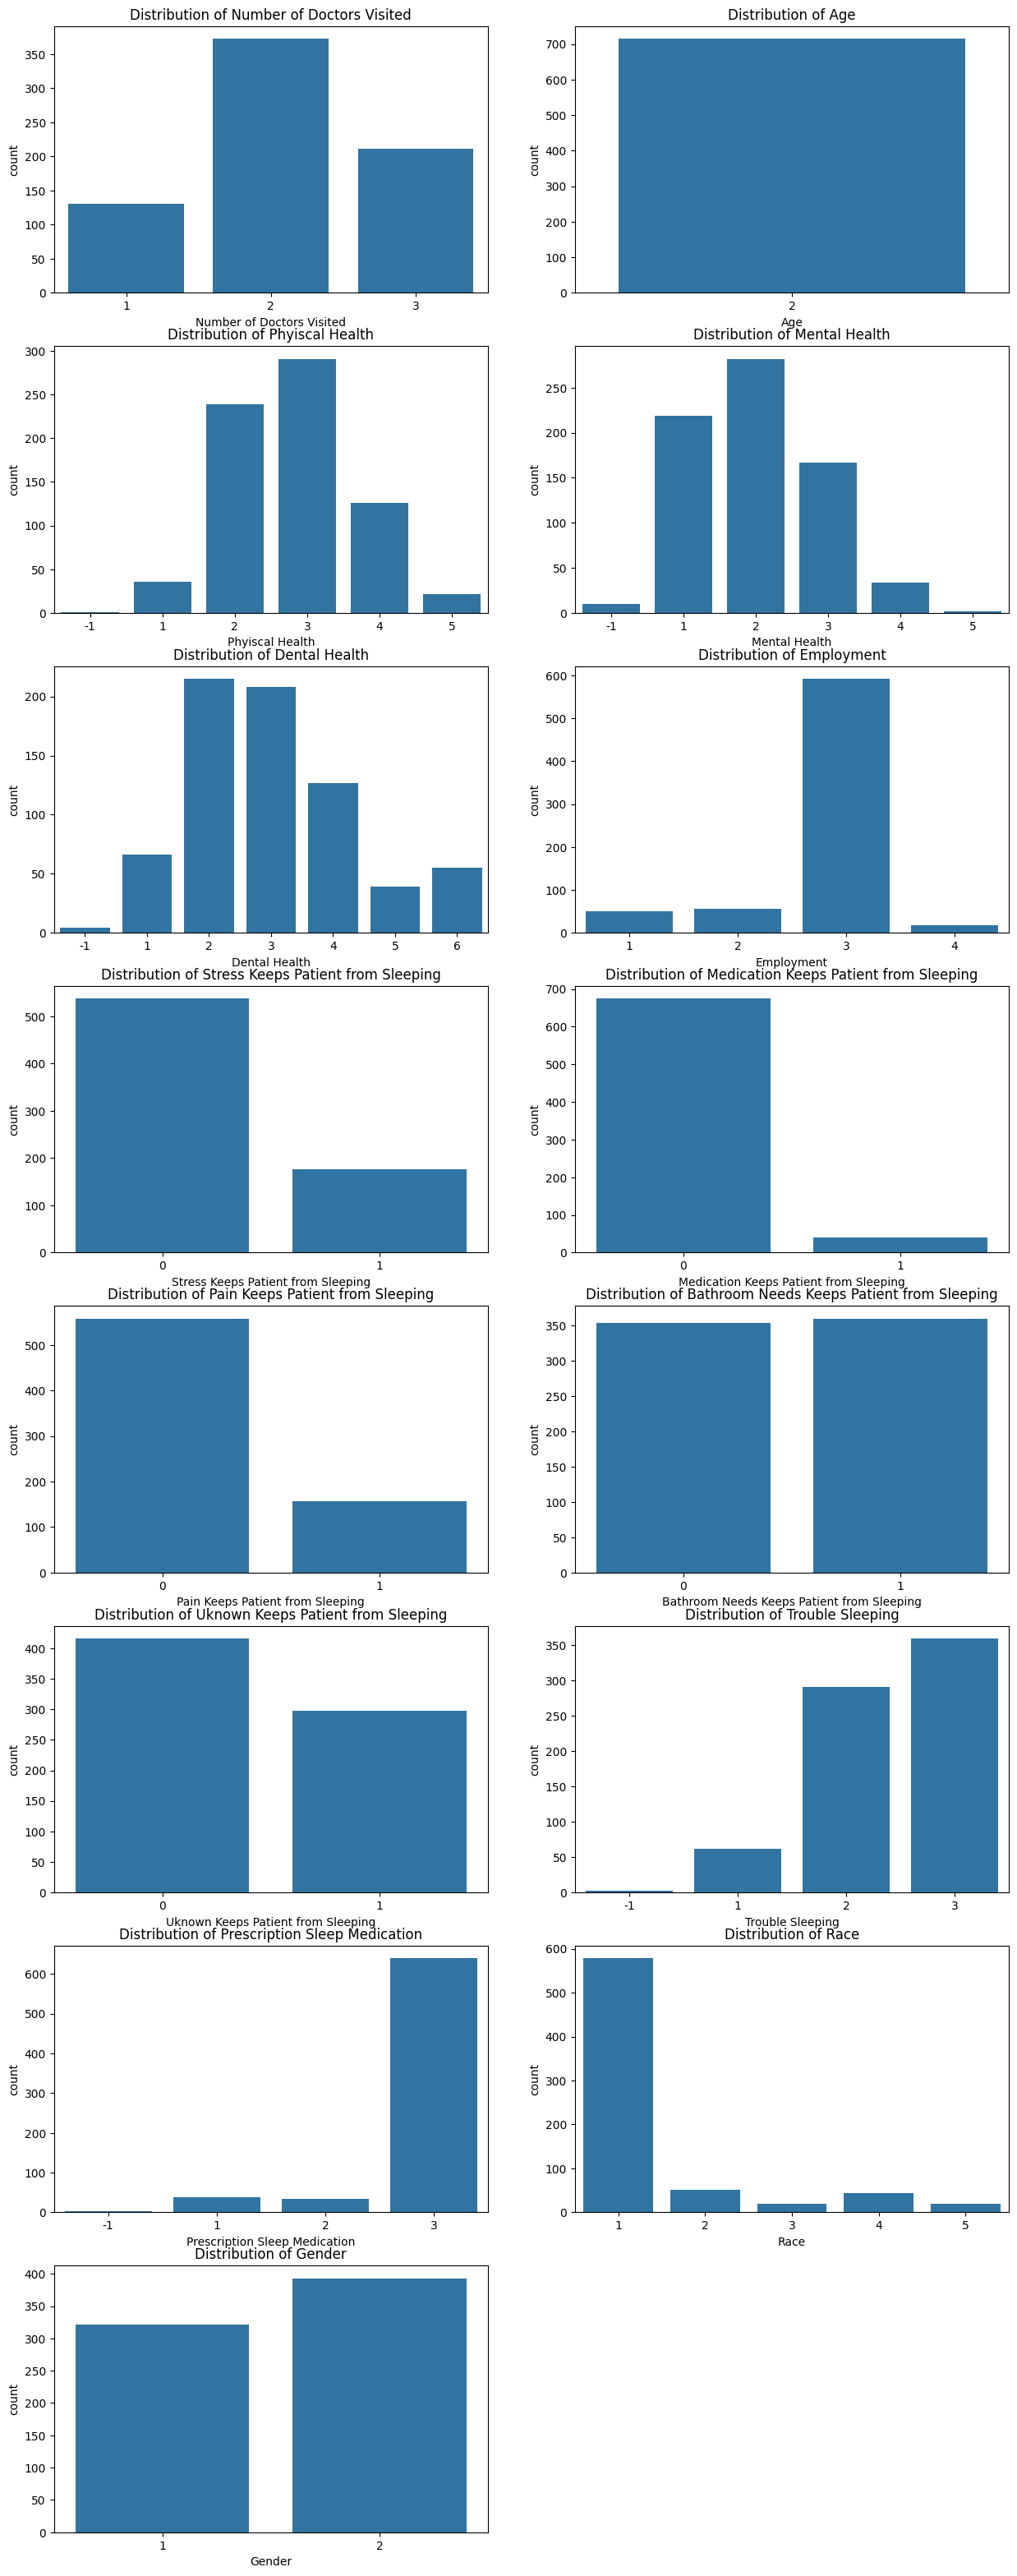

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 取得資料表欄位
data_col=data.columns.tolist()

# 設定子圖的行和列數，以便排列多個圖
rows = len(data_col)  # 行數等於類別型欄位數
cols = 2  # 每行顯示2個圖，根據需要調整
# 設定圖的大小
plt.figure(figsize=(15, 5 * rows))

for i, column in enumerate(data_col):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(data=data, x=column)
    plt.title(f'Distribution of {column}')

In [4]:
data = data[data['Blood Urea (mgs/dL)']<300]
data = data[data['Serum Creatinine (mgs/dL)']<40]
data = data[data['Sodium (mEq/L)']>80]
data = data[data['Potassium (mEq/L)']<30]
data = data[data['White Blood Cells (cells/cmm)']<20000]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       392 non-null    float64
 1   Blood Pressure (mm/Hg)          392 non-null    float64
 2   Specific Gravity                392 non-null    float64
 3   Albumin                         392 non-null    float64
 4   Sugar                           392 non-null    float64
 5   Blood Glucose Random (mgs/dL)   392 non-null    float64
 6   Blood Urea (mgs/dL)             392 non-null    float64
 7   Serum Creatinine (mgs/dL)       392 non-null    float64
 8   Sodium (mEq/L)                  392 non-null    float64
 9   Potassium (mEq/L)               392 non-null    float64
 10  Hemoglobin (gms)                392 non-null    float64
 11  Packed Cell Volume              392 non-null    float64
 12  White Blood Cells (cells/cmm)   392 non-n

In [5]:
#應變數轉為label
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data['ckd_encode'] = labelencoder.fit_transform(data['Chronic Kidney Disease: yes'])
data

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0         48.0                    80.0             1.020      1.0    0.0   
1          7.0                    50.0             1.020      4.0    0.0   
2         62.0                    80.0             1.010      2.0    3.0   
3         48.0                    70.0             1.005      4.0    0.0   
4         51.0                    80.0             1.010      2.0    0.0   
..         ...                     ...               ...      ...    ...   
395       55.0                    80.0             1.020      0.0    0.0   
396       42.0                    70.0             1.025      0.0    0.0   
397       12.0                    80.0             1.020      0.0    0.0   
398       17.0                    60.0             1.025      0.0    0.0   
399       58.0                    80.0             1.025      0.0    0.0   

     Blood Glucose Random (mgs/dL)  Blood Urea (mgs/dL)  \
0                       121.000000                 36.0   
1                        90.316581                 18.0   
2                       423.000000                 53.0   
3                       117.000000                 56.0   
4                       106.000000                 26.0   
..                             ...                  ...   
395                     140.000000                 49.0   
396                      75.000000                 31.0   
397                     100.000000                 26.0   
398                     114.000000                 50.0   
399                     131.000000                 18.0   

     Serum Creatinine (mgs/dL)  Sodium (mEq/L)  Potassium (mEq/L)  ...  \
0                          1.2           136.0                4.7  ...   
1                          0.8           140.0                4.0  ...   
2                          1.8           135.0                4.8  ...   
3                          3.8           111.0                2.5  ...   
4                          1.4           140.0                4.0  ...   
..                         ...             ...                ...  ...   
395                        0.5           150.0                4.9  ...   
396                        1.2           141.0                3.5  ...   
397                        0.6           137.0                4.4  ...   
398                        1.0           135.0                4.9  ...   
399                        1.1           141.0                3.5  ...   

     Pus Cell Clumps: present  Bacteria: present  Hypertension: yes  \
0                         0.0                0.0                1.0   
1                         0.0                0.0                0.0   
2                         0.0                0.0                0.0   
3                         1.0                0.0                1.0   
4                         0.0                0.0                0.0   
..                        ...                ...                ...   
395                       0.0                0.0                0.0   
396                       0.0                0.0                0.0   
397                       0.0                0.0                0.0   
398                       0.0                0.0                0.0   
399                       0.0                0.0                0.0   

     Diabetes Mellitus: yes  Coronary Artery Disease: yes  Appetite: poor  \
0                       1.0                           0.0             0.0   
1                       0.0                           0.0             0.0   
2                       1.0                           0.0             1.0   
3                       0.0                           0.0             1.0   
4                       0.0                           0.0             0.0   
..                      ...                           ...             ...   
395                     0.0                           0.0             0.0   
396                     0

In [6]:
##取得應變數資料 (因為 Scikit-learn 不支援類別型變數，所以需要encoding變數)
y=data['ckd_encode']

In [7]:
#取得自變數資料
X=data.iloc[:,0:24]
X

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0         48.0                    80.0             1.020      1.0    0.0   
1          7.0                    50.0             1.020      4.0    0.0   
2         62.0                    80.0             1.010      2.0    3.0   
3         48.0                    70.0             1.005      4.0    0.0   
4         51.0                    80.0             1.010      2.0    0.0   
..         ...                     ...               ...      ...    ...   
395       55.0                    80.0             1.020      0.0    0.0   
396       42.0                    70.0             1.025      0.0    0.0   
397       12.0                    80.0             1.020      0.0    0.0   
398       17.0                    60.0             1.025      0.0    0.0   
399       58.0                    80.0             1.025      0.0    0.0   

     Blood Glucose Random (mgs/dL)  Blood Urea (mgs/dL)  \
0                       121.000000                 36.0   
1                        90.316581                 18.0   
2                       423.000000                 53.0   
3                       117.000000                 56.0   
4                       106.000000                 26.0   
..                             ...                  ...   
395                     140.000000                 49.0   
396                      75.000000                 31.0   
397                     100.000000                 26.0   
398                     114.000000                 50.0   
399                     131.000000                 18.0   

     Serum Creatinine (mgs/dL)  Sodium (mEq/L)  Potassium (mEq/L)  ...  \
0                          1.2           136.0                4.7  ...   
1                          0.8           140.0                4.0  ...   
2                          1.8           135.0                4.8  ...   
3                          3.8           111.0                2.5  ...   
4                          1.4           140.0                4.0  ...   
..                         ...             ...                ...  ...   
395                        0.5           150.0                4.9  ...   
396                        1.2           141.0                3.5  ...   
397                        0.6           137.0                4.4  ...   
398                        1.0           135.0                4.9  ...   
399                        1.1           141.0                3.5  ...   

     Red Blood Cells: normal  Pus Cells: normal  Pus Cell Clumps: present  \
0                        1.0                1.0                       0.0   
1                        1.0                1.0                       0.0   
2                        1.0                1.0                       0.0   
3                        1.0                0.0                       1.0   
4                        1.0                1.0                       0.0   
..                       ...                ...                       ...   
395                      1.0                1.0                       0.0   
396                      1.0                1.0                       0.0   
397                      1.0                1.0                       0.0   
398                      1.0                1.0                       0.0   
399                      1.0                1.0                       0.0   

     Bacteria: present  Hypertension: yes  Diabetes Mellitus: yes  \
0                  0.0                1.0                     1.0   
1                  0.0                0.0                     0.0   
2                  0.0                0.0                     1.0   
3                  0.0                1.0                     0.0   
4                  0.0                0.0                     0.0   
..                 ...                ...                     ...   
395                0.0                0.0                     0.0   
396              

In [8]:
#檢查資料大小
X.shape

(392, 24)

In [9]:
#分割資料集
from sklearn.model_selection import train_test_split

#可自行調整test_size值
# X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.5)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.2)

In [10]:
#建立決策樹模型
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [11]:
#模型準確度
y_pred = model.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 1.0
Test data accuracy: 1.0


In [12]:
# 取得資料表欄位 並移除label欄位
data_col=data.columns.tolist()
data_col.remove('Chronic Kidney Disease: yes')
data_col.remove('ckd_encode')

In [13]:
#輸出成dot檔案格式
from sklearn import tree
tree.export_graphviz(model,out_file='tree_rule_ckd.dot', 
                     feature_names=data_col,
                     class_names=['0','1'],
                     filled=True,
                     node_ids=True,
                     rounded=True,
                     special_characters=True)

In [14]:
#將dot檔案貼上dot視覺化網站
https://dreampuf.github.io/GraphvizOnline/#digraph%20G%20%7B%0A%0A%20%20subgraph%20cluster_0%20%7B%0A%20%20%20%20style%3Dfilled%3B%0A%20%20%20%20color%3Dlightgrey%3B%0A%20%20%20%20node%20%5Bstyle%3Dfilled%2Ccolor%3Dwhite%5D%3B%0A%20%20%20%20a0%20-%3E%20a1%20-%3E%20a2%20-%3E%20a3%3B%0A%20%20%20%20label%20%3D%20%22process%20%231%22%3B%0A%20%20%7D%0A%0A%20%20subgraph%20cluster_1%20%7B%0A%20%20%20%20node%20%5Bstyle%3Dfilled%5D%3B%0A%20%20%20%20b0%20-%3E%20b1%20-%3E%20b2%20-%3E%20b3%3B%0A%20%20%20%20label%20%3D%20%22process%20%232%22%3B%0A%20%20%20%20color%3Dblue%0A%20%20%7D%0A%20%20start%20-%3E%20a0%3B%0A%20%20start%20-%3E%20b0%3B%0A%20%20a1%20-%3E%20b3%3B%0A%20%20b2%20-%3E%20a3%3B%0A%20%20a3%20-%3E%20a0%3B%0A%20%20a3%20-%3E%20end%3B%0A%20%20b3%20-%3E%20end%3B%0A%0A%20%20start%20%5Bshape%3DMdiamond%5D%3B%0A%20%20end%20%5Bshape%3DMsquare%5D%3B%0A%7D


SyntaxError: invalid syntax (1507109718.py, line 2)

In [ ]:
#分割資料集
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='entropy')
test_acc_list = []

for i in range(1,99):
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = i/100)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("test_size:", i/100)
    print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=model.predict(X_train)))
    test_acc = accuracy_score(y_true = y_test, y_pred=y_pred)
    test_acc_list.append(test_acc)
    print("Test data accuracy:",test_acc)
    print("-----------------------")

import matplotlib.pyplot as plt
plt.plot(np.arange(0.01,0.99,0.01),test_acc_list)
plt.show()